In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 18

In [6]:
df = pd.read_csv('./multi_N25.csv')

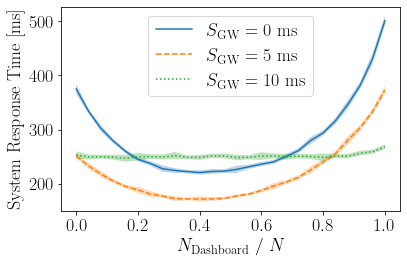

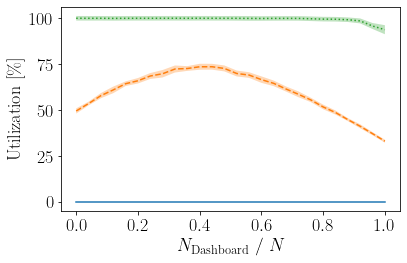

In [7]:
SAVEFIG = True
SAVEPATH = '../Images/Gateway_Offloading/'

STYLES = ['-', '--', ':']


df['S_gw'] = 1 / df['r_gw']
df.sort_values(by=['N_A', 'S_gw'], inplace=True)
df ['N_A/N'] = df['N_A'] / (df['N_A'] + df['N_B'])


for Sgw, st in zip([10**(-15), 5, 10], STYLES):
    dfPlot = df[df['S_gw']==Sgw]
    plt.plot(dfPlot['N_A/N'], dfPlot['R0'], st, label=r'$S_{\mathrm{GW}}$ = {%d} ms' % Sgw)
    plt.fill_between(dfPlot['N_A/N'], dfPlot['R0_low'], dfPlot['R0_up'], alpha=0.3)
plt.xlabel(r'$N_\mathrm{{Dashboard}}~/~N$')
plt.ylabel('System Response Time [ms]')
plt.legend()
if SAVEFIG:
    plt.tight_layout()
    plt.savefig(SAVEPATH + 'respTime.pdf')
plt.show()


for Sgw, st in zip([10**(-15), 5, 10], STYLES):
    dfPlot = df[df['S_gw']==Sgw]
    plt.plot(dfPlot['N_A/N'], dfPlot['Ugw']*100, st, label=r'$S_{\mathrm{GW}}$ = {%d} ms' % Sgw)
    plt.fill_between(dfPlot['N_A/N'], dfPlot['Ugw_low']*100, dfPlot['Ugw_up']*100, alpha=0.3)
plt.xlabel(r'$N_\mathrm{{Dashboard}}~/~N$')
plt.ylabel('Utilization [\%]')
#plt.legend()
if SAVEFIG:
    plt.tight_layout()
    plt.savefig(SAVEPATH + 'utilization.pdf')
plt.show()